##  Serie 2 exercice 4

Un train, initialement au repos,  sur une piste circulaire de rayon $R$ accélère avec une accélération angulaire constante $\alpha$ pendant un tour puis continue avec la vitesse scalaire acquise

$\alpha = $cte; 

$\omega = \alpha t$;

$\theta = \frac{1}{2} \alpha t^2$;

$v=R \omega$;

$a_n=\frac{v^2}{R} =R \alpha^2 t^2$;

$a_\tau=R\alpha$

Un tour vaut $2 \pi$ radians et est atteint au temps $t_m$

$t_m=\sqrt{\frac{4 \pi}{\alpha}}$


In [1]:
import matplotlib
import pylab
from pylab import scatter
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Dans un premier temps, on fixe le rayon et l'acceleration angulaire. La valeur de $R=0.5$m et $\alpha=0.785$m.s$^{-2}$ sont celles qui correspondent aux données de l'énnoncé. 

On génère un tableau de 1000 points de temps entre 0 et $2 . t_m$ et on calcule les vitesses et accélérations puis on les trace.

tm= 4.001014300437412 s


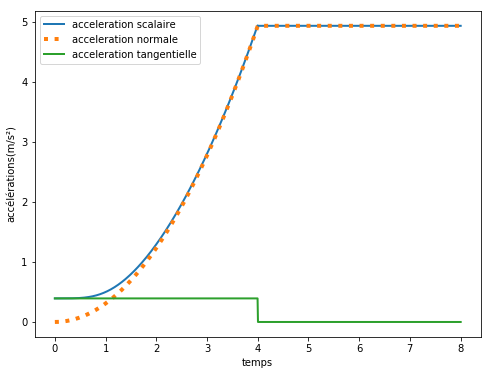

In [2]:
#Les données sont le rayon et l'acceleration angulaire
R=0.5
alpha=0.785
#Temps pour arriver à 1 tour
tm=np.sqrt(4*np.pi/alpha)
print("tm=",tm,"s")
# On utilise le temps comme parametre, on fait une grille de 100 points entre 0 et 2*tm
temps = np.linspace(0,2*tm,1000)

def v(R,alpha,t):
    vitesse=R*alpha*t
    return vitesse

vitesses=[]
for i in temps:
    if i < tm:
        vitesses.append(v(R,alpha,i))
    else: vitesses.append(v(R,alpha,tm))

def an(R,alpha,t):
    AccNorm=v(R,alpha,t)**2/R
    return AccNorm

accelerationsnormales=[]
for i in temps:
    if i < tm:
        accelerationsnormales.append(an(R,alpha,i))
    else: accelerationsnormales.append(an(R,alpha,tm))

accelerationstangentielles=[]
for i in temps:
    if i < tm:
        accelerationstangentielles.append(R*alpha)
    else: accelerationstangentielles.append(0)

accelerations=[]
for i in range(1,1001) :
    accelerations.append(np.sqrt(accelerationsnormales[i-1]**2+accelerationstangentielles[i-1]**2))

matplotlib.rcParams['figure.figsize'] = (8,6)
    
    
plt.plot(temps,accelerations,label="acceleration scalaire",lw=2)
plt.plot(temps,accelerationsnormales,label="acceleration normale", lw=4,ls=':')
plt.plot(temps,accelerationstangentielles,label="acceleration tangentielle",lw=2)
plt.legend()
plt.xlabel("temps")
plt.ylabel("accélérations(m/s"+chr(0x00B2)+")")
plt.show()

Il est intéressant de remarquer que le décrochement (discontinuité) bien visible dans l'accélération tangentielle quand le train cesse d'accélérer au bout d'un tour, semble avoir disparu de l'accélération scalaire. Cela vient du calcul de la norme qui rend négligeable le terme environ 10 fois plus petit (il devient ~50 fois plus petit)

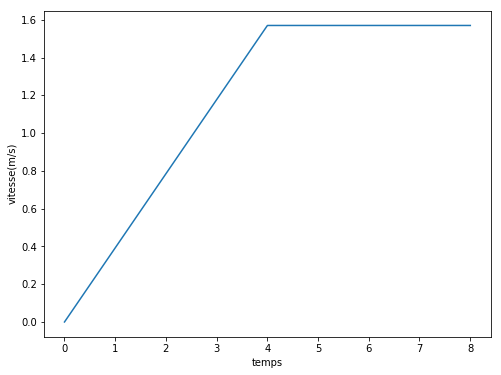

In [3]:
plt.plot(temps,vitesses)
plt.xlabel("temps")
plt.ylabel("vitesse(m/s)")
plt.show()

On peut aussi rechercher graphiquement l'accélération angulaire qui donnera la vitesse maximum après un certain nombre de tours. Ici, on suppose l'accélération angulaire constante, mais on peut la choisir entre 0 et 2 m/s^2 grâce au slider

La ligne rouge correspond a la vitesse maximale du train de 1.57m/s

On peut ajuster le slider pour arriver à cette vitesse au bout de 1 tour


In [4]:
matplotlib.rcParams['figure.figsize'] = (8,6)


def vdetheta(alpha,theta):
    v=R*np.sqrt(2*theta*alpha)
    return v

def plotvdetour(alpha):
    tours = np.linspace(0,2,1000)
    theta = 2*np.pi*tours
    v=vdetheta(alpha,theta)
    plt.grid(True)
    plt.xlabel('nombre de tours')
    plt.ylabel('vitesse (m/s)')
    plt.plot(tours,v)
    plt.axhline(y=1.57, color='r', linestyle='-',lw=2)
    plt.show()
    
interact(plotvdetour, alpha=(0,2,.05) ) ;      

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.05), Output()), _dom_classes…

Sur cette figure, on représente par des vecteurs la vitesse (en bleu) et l'accélération normale (en rouge) en fonction de la position du train lors de son premier tour. On voit biem l'accélération normale qui varie en $v^2$. 

On remarque que la vitesse, qui variait __linéairement__  en fonction du  **temps**, varie seulement en $\sqrt \theta$


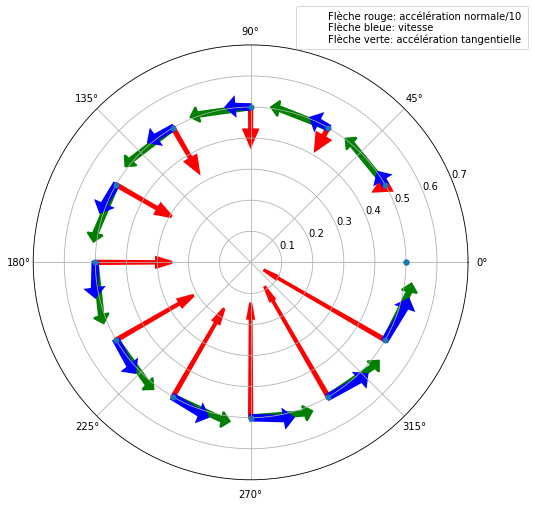

In [7]:
matplotlib.rcParams['figure.figsize'] = (8,8)
theta=np.linspace(0,2*np.pi,13)
rayon=np.linspace(R,R,13)
acnormtheta=2*R*theta*alpha
actantheta=R*alpha
vittheta=R*np.sqrt(2*alpha*theta)
ax = plt.subplot(111, projection='polar')
ax.plot(theta, rayon,'.',markersize=10, label="Flèche rouge: accélération normale/10 \nFlèche bleue: vitesse \nFlèche verte: accélération tangentielle")
#check def arctantheta. Ca bug niveau de l'affichage si je mets pas le theta
def arrDx(vitesse):
    return np.arctan((vitesse/10)/.5)

def arrDy(vitesse):
    return np.sqrt(.5**2+(vitesse/10)**2)-.5
ax.set_rmax(0.7)
for i in range(1,12) :
    
    plt.arrow(theta[i], 0.5, actantheta/1, arrDy(vittheta[i]),  width = 0.015,
                 edgecolor = 'green', facecolor='g', lw = 2,head_width=0.05, head_length=0.05,length_includes_head='true')
    
    plt.arrow(theta[i], 0.5, 0, -acnormtheta[i]/10,  width = 0.015,
                 edgecolor = 'red', facecolor='red', lw = 3,head_width=0.1, head_length=0.05,length_includes_head='true')

    plt.arrow(theta[i], 0.5, arrDx(vittheta[i]), arrDy(vittheta[i]),  width = 0.015,
                 edgecolor = 'blue', facecolor='b',  lw = 3,head_width=0.05, head_length=0.05,length_includes_head='true')

plt.legend(bbox_to_anchor=(1.15,1.1), markerscale=0)
plt.show()

C'est la même figure, mais on peut faire bouger la position du train avec le slider

In [8]:
matplotlib.rcParams['figure.figsize'] = (8,8)

def plotpolaire (theta):
    acnormtheta=2*R*theta*alpha
    vittheta=R*np.sqrt(2*alpha*theta)
    ax = plt.subplot(111, projection='polar')
    ax.plot(theta, R,'.',markersize=10, label="Flèche rouge: accélération normale \nFlèche bleue: vitesse")
    ax.set_rmax(0.6)
    plt.arrow(theta, R, 0, -acnormtheta/10,  width = 0.015,
                 edgecolor = 'red', facecolor='r', lw = 3,head_width=0.1, head_length=0.05)

    plt.arrow(theta, R, np.arctan((vittheta/10)/R), (np.sqrt(R**2+(vittheta/10)**2)-R),  width = 0.015,
                 edgecolor = 'blue', facecolor='b',  lw = 2,head_width=0.05, head_length=0.05)

    plt.legend(bbox_to_anchor=(1.15,1.1), markerscale=0)
    plt.show()
    
interact_manual(plotpolaire, theta=(0,2*np.pi,.1) ) ;      

interactive(children=(FloatSlider(value=3.1, description='theta', max=6.283185307179586), Button(description='…